## Partiendo de las bases de Saber 11 y saber Pro que pueden cruzarse se construye los datasets necesarios para realizar el analisis descriptivo y predictivo. 
## Incluye la limpieza, creacion de variables, validacion de formatos y missing values 


## 1. Instalar librerias

In [1]:
import pandas as pd
import numpy as np
import copy
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

import sklearn.metrics       as Metrics

import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Para Ejecutar en Google Drive

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## 2. Leer bases

In [4]:
os.chdir('C:/Users/nohor/Documents/DS4A/Project/Data')
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

In [5]:
SaberPro = pd.read_csv('SaberProKey.csv', parse_dates=['estu_fechanacimiento'])
Saber11 = pd.read_csv('Saber11.csv')
print (SaberPro.shape)
print (Saber11.shape)

C:\Users\nohor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,9,11,12,13,14,16,17,31,32,33,34,37,38,40,41,46,49,50,51,53,54,57,58,59,65,71,74,91,92,93,94,95,96,99,100,101,102,103,104,105,106,107,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\nohor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,5,11,12,13,15,17,18,19,20,21,22,23,24,25,27,29,31,35,45,47,49,50,60,63,69,73,75,76,78,79,87,88,89,95,96,97,98,99,100,101,119,120,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210

(990583, 138)
(409716, 296)


In [6]:
SaberPro1=SaberPro[(SaberPro.periodo >= 20160)].copy()

In [7]:
SaberPro1.shape

(990583, 138)

In [8]:
SaberPro1.dtypes

estu_tipodocumento       object
estu_nacionalidad        object
estu_genero              object
estu_fechanacimiento     object
estu_exterior            object
                         ...   
estu_consecutivo_PRO     object
KeySaber11              float64
len1                    float64
len2                    float64
KeySaberPRO             float64
Length: 138, dtype: object

In [9]:
SaberPro1['estu_prgm_codmunicipio'] = SaberPro1['estu_prgm_codmunicipio'].astype('str')


In [10]:
SaberPro1['estu_prgm_codmunicipio'] = SaberPro1['estu_cod_reside_mcpio'].str.replace('-', '')
SaberPro1['estu_prgm_codmunicipio'] = SaberPro1['estu_cod_reside_mcpio'].str.replace('.', '')

SaberPro1['estu_cod_reside_mcpio'] = SaberPro1['estu_cod_reside_mcpio'].str.replace('-', '')
SaberPro1['estu_cod_reside_mcpio'] = SaberPro1['estu_cod_reside_mcpio'].str.replace('.', '')

In [11]:
SaberPro1.tail()

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,apli_consecutivo,estu_estudiante,estu_depto_reside,estu_cod_reside_depto,...,mod_competen_ciudada_pnbc,mod_ingles_pnbc,mod_comuni_escrita_pnbc,percentil_nbc,estu_consecutivo_11,estu_consecutivo_PRO,KeySaber11,len1,len2,KeySaberPRO
990578,CC,COLOMBIA,M,11/16/1994 12:00:00 AM,NO,20195,NaN,ESTUDIANTE,CALDAS,17,...,79.0,88.0,53.0,84.0,SB11201120408484,EK201950088494,20112.0,4.0,2.0,20195.0
990579,CC,COLOMBIA,F,02/06/1988 12:00:00 AM,NO,20195,NaN,ESTUDIANTE,ATLANTICO,8,...,4.0,20.0,45.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
990580,CC,COLOMBIA,F,02/21/1998 12:00:00 AM,NO,20195,NaN,ESTUDIANTE,BOGOTÁ,11,...,34.0,62.0,29.0,44.0,SB11201420031977,EK201950204940,20142.0,4.0,2.0,20195.0
990581,CC,COLOMBIA,F,01/07/1994 12:00:00 AM,NO,20195,NaN,ESTUDIANTE,BOGOTÁ,11,...,68.0,49.0,96.0,83.0,SB11201120292581,EK201950237739,20112.0,4.0,2.0,20195.0
990582,CC,COLOMBIA,M,11/08/1998 12:00:00 AM,NO,20195,NaN,ESTUDIANTE,BOGOTÁ,11,...,97.0,99.0,79.0,99.0,SB11201520141223,EK201950093878,20152.0,4.0,2.0,20195.0


In [12]:
DptoLocation= pd.read_csv('Departamento.csv')

MunLocation= pd.read_csv('Municipio.csv')

DptoLocation.head(2)

,CodDpto,Dpto,Lat,Lon,Departamento,REGION
0,91,Amazonas,-1.019722,-71.938333,AMAZONAS,Región Centro Sur
1,5,Antioquia,7.000000,-75.500000,ANTIOQUIA,Región Eje Cafetero - Antioquia


In [13]:
MunLocation.head(2)

,CÓDIGO DANE DEL DEPARTAMENTO,DEPARTAMENTO,DaneMun,MUNICIPIO,LatMun,LonMun,REGION
0,5,Antioquia,5001,Medellín,6.2913889,-75.536111,Región Eje Cafetero - Antioquia
1,5,Antioquia,5002,Abejorral,5.75,-75.416667,Región Eje Cafetero - Antioquia


In [14]:
MunLocation.dtypes

CÓDIGO DANE DEL DEPARTAMENTO      int64
DEPARTAMENTO                     object
DaneMun                           int64
MUNICIPIO                        object
LatMun                           object
LonMun                          float64
REGION                           object
dtype: object

In [15]:
MunLocation['DaneMunText'] = MunLocation['DaneMun'].astype('str')
MunLocation['LatMun'] = pd.to_numeric(MunLocation['LatMun'],errors='coerce')


In [16]:
DptoEducacion= pd.read_csv('EducacionBasicaPorDepartamento.csv')
DptoEducacion.head(2)

,AÑO,CODIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACION_5_16,TASA_MATRICULACION_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2019,5,ANTIOQUIA,"1,149,985",93.9956,93.8331,67.8559,90.2360,82.6005,45.0394,...,7.5932,0.1809,5.9781,11.5650,5.6803,3.1925,0.2452,2.9207,4.6485,1.3709
1,2019,8,ATLANTICO,"533,666",92.0877,91.7143,62.6951,89.3773,76.9528,48.9640,...,5.8266,1.2644,4.8324,8.6285,4.3168,1.0022,0.7554,1.0641,1.1767,0.4236


In [17]:
Colegios= pd.read_csv('ColegiosSaber11_2019.csv')
Colegios.head(2)

,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,...,NOCHE.6,SABATINA.6,TARDE.6,UNICA.6,COMPLETA.7,MAÑANA.7,NOCHE.7,SABATINA.7,TARDE.7,UNICA.7
0,105001000001,INST EDUC FE Y ALEGRIA JOSE MARIA VELAZ,S,URBANO,5001,5,MIXTO,OFICIAL,A,N,...,NaN,NaN,238.692308,NaN,NaN,NaN,NaN,NaN,45.410256,NaN
1,105001000043,INST EDUC BARRIO SANTA CRUZ,S,URBANO,5001,5,MIXTO,OFICIAL,A,N,...,211.111111,NaN,229.617647,NaN,NaN,NaN,29.296296,NaN,40.411765,NaN


In [18]:
EdadBase= pd.read_csv('Edad.csv')
EdadBase.dtypes

estu_fechanacimiento    object
estu_consecutivo        object
periodo                  int64
Longitud                 int64
YearNac                  int64
Edad                     int64
unico                    int64
filtro                   int64
dtype: object

In [19]:
dfProgramas= pd.read_csv('dfProgramas.csv')
dfProgramas.dtypes

estu_prgm_academico           object
Estudiantes                    int64
mod_razona_cuantitat_punt    float64
APROBACIÓN                   float64
REPITENCIA                   float64
mod_lectura_critica_punt     float64
inst_nombre_institucion        int64
ClusterProgramasEscalado       int64
Programas                     object
dtype: object

In [20]:
dfDpto= pd.read_csv('dfDpto.csv')
dfDpto.dtypes

estu_prgm_departamento          object
Estudiantes                      int64
mod_razona_cuantitat_punt      float64
APROBACIÓN                     float64
REPITENCIA                     float64
mod_lectura_critica_punt       float64
estu_prgm_academico              int64
estu_mcpio_reside_x              int64
inst_nombre_institucion          int64
ClusterDepartamentoEscalado      int64
DepartamentoClus                object
dtype: object

In [21]:
dfInstituciones= pd.read_csv('dfInstituciones.csv')
dfInstituciones.dtypes

inst_nombre_institucion        object
Estudiantes                     int64
mod_razona_cuantitat_punt     float64
APROBACIÓN                    float64
REPITENCIA                    float64
mod_lectura_critica_punt      float64
estu_prgm_academico             int64
ClusterInstitucionEscalado      int64
Institucion                    object
dtype: object

In [22]:
dfProgramas['ClusterProgramasEscalado'] = dfProgramas['ClusterProgramasEscalado'].astype(str)
dfDpto['ClusterDepartamentoEscalado'] = dfDpto['ClusterDepartamentoEscalado'].astype(str)
dfInstituciones['ClusterInstitucionEscalado'] = dfInstituciones['ClusterInstitucionEscalado'].astype(str)

## 3. Seleccionar Columnas

In [23]:
#print(SaberProKey.shape)
#for i in SaberProKey.columns:
#  print(i)

In [24]:
## Seleccionar Columnas
df =      pd.merge(SaberPro1[[
                            #Variables para el modelo
    
                                'estu_comocapacitoexamensb11',
                                'estu_genero',
                                'estu_horassemanatrabaja',
                                'estu_metodo_prgm',
                                'estu_nucleo_pregrado',
                                'estu_pagomatriculabeca',
                                'estu_pagomatriculacredito',
                                'estu_pagomatriculapadres',
                                'estu_pagomatriculapropio',
                                'fami_educacionmadre',
                                'fami_educacionpadre',
                                'fami_estratovivienda',
                                'fami_tieneautomovil',
                                'fami_tienecomputador',
                                'fami_tienehornomicroogas',
                                'fami_tieneinternet',
                                'fami_tienelavadora',
                                'fami_tienemotocicleta',
                                'inst_caracter_academico',
                                'estu_areareside',
                                'fami_cuantoscompartebaño',
                                'fami_trabajolabormadre',
                                'fami_trabajolaborpadre',
                                    'gruporeferencia',

    
                            #Variables utilizadas para nuevas variables para el modelo o filtrar
                                
                                'estu_cod_reside_mcpio',
                                'estu_cole_termino',
                                'estu_depto_presentacion',
                                'estu_depto_reside',
                                'estu_fechanacimiento',
                                'estu_inst_departamento',
                                'estu_inst_municipio',
                                'estu_mcpio_reside',
                                'estu_prgm_academico',
                                'estu_prgm_departamento',
                                'estu_snies_prgmacademico',
                                'estu_valormatriculauniversidad',
                                'inst_cod_institucion',
                                'inst_nombre_institucion',
                                'inst_origen',
                                
                                'estu_cod_cole_mcpio_termino',
                                'estu_coddane_cole_termino',
                                'estu_pais_reside',
                                'estu_cod_reside_depto',
                                


                            
                            #Variables de respuesta
    
                                'mod_competen_ciudada_desem',
                                'mod_competen_ciudada_pnal',
                                'mod_competen_ciudada_punt',
                                'mod_comuni_escrita_desem',
                                'mod_comuni_escrita_pnal',
                                'mod_comuni_escrita_punt',
                                'mod_ingles_desem',
                                'mod_ingles_pnal',
                                'mod_ingles_punt',
                                'mod_lectura_critica_desem',
                                'mod_lectura_critica_pnal',
                                'mod_lectura_critica_punt',
                                'mod_razona_cuantitat_desem',
                                'mod_razona_cuantitat_punt',
                                'mod_razona_cuantitativo_pnal',
                                'percentil_global',
                                'punt_global',

    

                            
                            #ID
                                'estu_consecutivo',
                                'estu_consecutivo_11',
                                'estu_consecutivo_PRO',
                                'KeySaber11',
                                'KeySaberPRO',
                                'periodo'

    
                       ]],
         
              Saber11[[
                             
                             'estu_pais_reside',
                            'estu_depto_reside',
                            'estu_mcpio_reside',
                            'estu_cod_reside_mcpio',
                            'estu_areareside',
                            'fami_educacionpadre',
                            'fami_educacionmadre',
                            'fami_personashogar',
                            'fami_cuartoshogar',
                            'fami_numlibros',
                            'estu_depto_presentacion',

                            'punt_lectura_critica',
                            'decil_lectura_critica',
                            'punt_matematicas',
                            'decil_matematicas',
                            'punt_c_naturales',
                            'decil_c_naturales',
                            'punt_sociales_ciudadanas',
                            'decil_sociales_ciudadanas',
                            'punt_razona_cuantitativo',
                            'decil_razona_cuantitativo',
                            'punt_comp_ciudadana',
                            'decil_comp_ciudadana',
                            'punt_ingles',
                            'decil_ingles',
                            'desemp_ingles',
                            'punt_global',
                            'estu_puesto',
                  
                            'cole_codigo_icfes',
                            'cole_cod_dane_establecimiento',
                            'cole_nombre_establecimiento',
                            'cole_genero',
                            'cole_naturaleza',
                            'cole_calendario',
                            'cole_bilingue',
                            'cole_caracter',
                            'cole_cod_dane_sede',
                            'cole_nombre_sede',
                            'cole_sede_principal',
                            'cole_area_ubicacion',
                            'cole_jornada',
                            'cole_cod_mcpio_ubicacion',
                            'cole_mcpio_ubicacion',
                            'cole_cod_depto_ubicacion',
                            'cole_depto_ubicacion',

                            'estu_cod_reside_depto',
                            'fami_estratovivienda',
                            'estu_horassemanatrabaja',

                            'periodo',
                            'KeySaber11',
                            'estu_consecutivo_PRO'
                      ]],
                              left_on='estu_consecutivo_PRO', right_on='estu_consecutivo_PRO'
         
              , how='left').copy()

    
df.shape

(1045290, 116)

In [25]:
df.head()

,estu_comocapacitoexamensb11,estu_genero,estu_horassemanatrabaja_x,estu_metodo_prgm,estu_nucleo_pregrado,estu_pagomatriculabeca,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,fami_educacionmadre_x,...,cole_jornada,cole_cod_mcpio_ubicacion,cole_mcpio_ubicacion,cole_cod_depto_ubicacion,cole_depto_ubicacion,estu_cod_reside_depto_y,fami_estratovivienda_y,estu_horassemanatrabaja_y,periodo_y,KeySaber11_y
0,Repasó por cuenta propia,F,Más de 30 horas,DISTANCIA,9 ADMINISTRACION,No,No,No,Si,Secundaria (Bachillerato) completa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Repasó por cuenta propia,M,Más de 30 horas,PRESENCIAL,66 PSICOLOGIA,No,No,Si,No,Técnica o tecnológica incompleta,...,MAÑANA,11001,NaN,NaN,NaN,NaN,NaN,NaN,20082.0,20082.0
2,Repasó por cuenta propia,F,0,PRESENCIAL,41 ENFERMERIA,No,No,Si,No,Secundaria (Bachillerato) completa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No realizó ninguna prueba de preparación,M,0,PRESENCIAL,32 INGENIERIA QUIMICA Y AFINES,Si,No,No,No,Educación profesional completa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Repasó por cuenta propia,M,Más de 30 horas,PRESENCIAL,9 ADMINISTRACION,No,No,No,Si,Educación profesional completa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.columns

Index(['estu_comocapacitoexamensb11', 'estu_genero',
       'estu_horassemanatrabaja_x', 'estu_metodo_prgm', 'estu_nucleo_pregrado',
       'estu_pagomatriculabeca', 'estu_pagomatriculacredito',
       'estu_pagomatriculapadres', 'estu_pagomatriculapropio',
       'fami_educacionmadre_x',
       ...
       'cole_jornada', 'cole_cod_mcpio_ubicacion', 'cole_mcpio_ubicacion',
       'cole_cod_depto_ubicacion', 'cole_depto_ubicacion',
       'estu_cod_reside_depto_y', 'fami_estratovivienda_y',
       'estu_horassemanatrabaja_y', 'periodo_y', 'KeySaber11_y'],
      dtype='object', length=116)

In [27]:
df.dtypes

estu_comocapacitoexamensb11     object
estu_genero                     object
estu_horassemanatrabaja_x       object
estu_metodo_prgm                object
estu_nucleo_pregrado            object
                                ...   
estu_cod_reside_depto_y         object
fami_estratovivienda_y          object
estu_horassemanatrabaja_y       object
periodo_y                      float64
KeySaber11_y                   float64
Length: 116, dtype: object

In [28]:
Colegios.dtypes

COLE_COD_DANE_SEDE            int64
COLE_NOMBRE_SEDE             object
COLE_SEDE_PRINCIPAL          object
COLE_AREA_UBICACION          object
COLE_COD_MCPIO_UBICACION      int64
                             ...   
MAÑANA.7                    float64
NOCHE.7                     float64
SABATINA.7                  float64
TARDE.7                     float64
UNICA.7                     float64
Length: 74, dtype: object

## 4. Cleaning

In [29]:
#Replacng '-' and '.' with nan
import re
for i in df.columns:
    df.loc[:,i] = df[i].replace('-', np.nan)
    df.loc[:,i] = df[i].replace('.', np.nan)
    


        
    

In [30]:
#cleaning programa academico var to remove "¿"
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('DISE¿O','DISEÑO',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('ADMINISTRACI¿N','ADMINISTRACION',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('LOG¿STICA','LOGISTICA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('M¿SICA','MUSICA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('COMUNICACI¿N','COMUNICACION',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('PEDAGOG¿A','PEDAGOGIA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('DISE¿¿O','DISEÑO',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('COMUNICACI¿¿N','COMUNICACION',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('GR¿¿FICA','GRAFICA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('P¿BLICA','PUBLICA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('MATEM¿TICAS','MATEMATICAS',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('INGENIER¿A','INGENIERIA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('GASTRONOM¿A','GASTRONOMIA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('EL¿CTRICA','ELECTRICA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('ESC¿NICAS','ESCENICAS',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('FILOSOF¿A','FILOSOFIA',x))
#df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(lambda x : re.sub('GEOLOG¿A','GEOLOGIA',x))

In [31]:
#Two academic program variables to keep: gruporeferencia and estu_prgm_academico
import re
#Converting into string so that they can be cleaned with the re library
df[["estu_nucleo_pregrado", "estu_prgm_academico", "gruporeferencia", "estu_inst_municipio", "estu_inst_departamento"]] = df[["estu_nucleo_pregrado", "estu_prgm_academico", "gruporeferencia", "estu_inst_municipio", "estu_inst_departamento"]].astype(str) 

In [32]:
#Removing numbers
df.loc[:,"gruporeferencia"] = df.gruporeferencia.apply(lambda x : re.sub('[0123456789]','',x))

In [33]:
df.loc[:,"estu_nucleo_pregrado"] = df.estu_nucleo_pregrado.apply(lambda x : re.sub('[0123456789]','',x))

In [34]:
#Remove trailing spaces
#Trim function
trim_function = lambda x : re.findall("^\s*(.*?)\s*$",str(x))[0]

df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(trim_function)
df.loc[:,"gruporeferencia"] = df.gruporeferencia.apply(trim_function)
df.loc[:,"estu_nucleo_pregrado"] = df.estu_nucleo_pregrado.apply(trim_function)

In [35]:
#Removing accents

#Remove tilde function
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        ("ü", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

#Removing tilde
df.loc[:,"estu_prgm_academico"] = df.estu_prgm_academico.apply(normalize)
df.loc[:,"gruporeferencia"] = df.gruporeferencia.apply(normalize)
df.loc[:,"estu_inst_departamento"] = df.estu_inst_departamento.apply(normalize)
df.loc[:,"estu_inst_municipio"] = df.estu_inst_municipio.apply(normalize)
df.loc[:,"estu_nucleo_pregrado"] = df.estu_nucleo_pregrado.apply(normalize)

In [36]:
#Fix municipio
df.loc[:,"estu_inst_municipio"] = df.estu_inst_municipio.apply(lambda x : re.sub('BOGOTA D.C.','BOGOTA, D.C.',x))

In [37]:
#Fix municipio
df.loc[:,"estu_inst_municipio"] = df.estu_inst_municipio.apply(lambda x : re.sub('BOGOTA D.C.','BOGOTA, D.C.',x))

In [38]:
#Create "school" category. Esto lo quiero cambiar para incluir categorias mas especificas de la variable gruporeferencia
#La variable gruporeferencia tiene todos los grupos de referencia pero esta llena de missing values
#Podemos modificar la variable estu_nucleo pregrado para que tenga las categorias de la variable gruporeferencia
df.loc[df.estu_nucleo_pregrado =='ADMINISTRACION', 'estu_nucleo_pregrado'] ='ADMINISTRACION'
df.loc[df.estu_nucleo_pregrado =='SOCIOLOGIA, TRABAJO SOCIAL Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA BIOMEDICA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='CONTADURIA PUBLICA', 'estu_nucleo_pregrado'] ='ADMINISTRACION'
df.loc[df.estu_nucleo_pregrado =='ANTROPOLOGIA, ARTES LIBERALES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA ELECTRONICA, TELECOMUNICACIONES Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='MEDICINA VETERINARIA', 'estu_nucleo_pregrado'] ='VETERINARIA'
df.loc[df.estu_nucleo_pregrado =='GEOLOGIA, OTROS PROGRAMAS DE CIENCIAS NATURALES', 'estu_nucleo_pregrado'] ='CIENCIAS NATURALES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA ADMINISTRATIVA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA INDUSTRIAL Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA AMBIENTAL, SANITARIA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA ELECTRICA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='ECONOMIA', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='COMUNICACION SOCIAL, PERIODISMO Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA DE MINAS, METALURGIA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='BIOLOGIA, MICROBIOLOGIA Y AFINES', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='MATEMATICAS, ESTADISTICA Y AFINES', 'estu_nucleo_pregrado'] ='CIENCIAS NATURALES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA AGRONOMICA, PECUARIA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA QUIMICA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='ARTES PLASTICAS, VISUALES Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA AGRICOLA, FORESTAL Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='FORMACION RELACIONADA CON EL CAMPO MILITAR O POLICIAL', 'estu_nucleo_pregrado'] ='OTRAS'
df.loc[df.estu_nucleo_pregrado =='LENGUAS MODERNAS, LITERATURA, LINGUISTICA Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='CIENCIA POLITICA, RELACIONES INTERNACIONALES', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA AGROINDUSTRIAL, ALIMENTOS Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='DEPORTES, EDUCACION FISICA Y RECREACION', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='FILOSOFIA, TEOLOGIA Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='BIBLIOTECOLOGIA, OTROS DE CIENCIAS SOCIALES Y HUMANAS', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='ODONTOLOGIA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES', 'estu_nucleo_pregrado'] ='ARTE'
df.loc[df.estu_nucleo_pregrado =='NUTRICION Y DIETETICA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='OPTOMETRIA, OTROS PROGRAMAS DE CIENCIAS DE LA SALUD', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='SIN CLASIFICAR', 'estu_nucleo_pregrado'] ='OTRAS'
df.loc[df.estu_nucleo_pregrado =='BIBLIOTECOLOGIA,OTROS DE CIENCIAS SOCIALES Y HUMANAS', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='EDUCACION', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='MEDICINA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA MECANICA Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='DERECHO Y AFINES', 'estu_nucleo_pregrado'] ='DERECHO'
df.loc[df.estu_nucleo_pregrado =='GEOGRAFIA, HISTORIA', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='ARQUITECTURA', 'estu_nucleo_pregrado'] ='ARQUI-DISENO'
df.loc[df.estu_nucleo_pregrado =='AGRONOMIA', 'estu_nucleo_pregrado'] ='VETERINARIA'
df.loc[df.estu_nucleo_pregrado =='ENFERMERIA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='INGENIERIA CIVIL Y AFINES', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='BACTERIOLOGIA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='ZOOTECNIA', 'estu_nucleo_pregrado'] ='VETERINARIA'
df.loc[df.estu_nucleo_pregrado =='OTRAS INGENIERIAS', 'estu_nucleo_pregrado'] ='INGENIERIA'
df.loc[df.estu_nucleo_pregrado =='INSTRUMENTACION QUIRURGICA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='MUSICA', 'estu_nucleo_pregrado'] ='ARTE'
df.loc[df.estu_nucleo_pregrado =='FISICA', 'estu_nucleo_pregrado'] ='CIENCIAS NATURALES'
df.loc[df.estu_nucleo_pregrado =='ARTES REPRESENTATIVAS', 'estu_nucleo_pregrado'] ='ARTE'
df.loc[df.estu_nucleo_pregrado =='QUIMICA Y AFINES', 'estu_nucleo_pregrado'] ='CIENCIAS NATURALES'
df.loc[df.estu_nucleo_pregrado =='SALUD PUBLICA', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='SIN ESPECIFICAR', 'estu_nucleo_pregrado'] ='OTRAS'
df.loc[df.estu_nucleo_pregrado =='PSICOLOGIA', 'estu_nucleo_pregrado'] ='CIENCIAS SOCIALES'
df.loc[df.estu_nucleo_pregrado =='TERAPIAS', 'estu_nucleo_pregrado'] ='CIENCIAS DE LA SALUD'
df.loc[df.estu_nucleo_pregrado =='DISEÑO', 'estu_nucleo_pregrado'] ='ARQUI-DISENO'
df.loc[df.estu_nucleo_pregrado =='PUBLICIDAD Y AFINES', 'estu_nucleo_pregrado'] ='HUMANIDADES'
df.loc[df.estu_nucleo_pregrado =='', 'estu_nucleo_pregrado'] ='OTRAS'
df.loc[df.estu_nucleo_pregrado == np.nan, 'estu_nucleo_pregrado'] ='OTRAS'

In [39]:
df.groupby(df['estu_nucleo_pregrado']).size()

estu_nucleo_pregrado
ADMINISTRACION          291556
ARQUI-DISENO             32975
ARTE                      4784
CIENCIAS DE LA SALUD     95969
CIENCIAS NATURALES        8774
CIENCIAS SOCIALES        99116
DERECHO                  85571
HUMANIDADES             172558
INGENIERIA              219172
OTRAS                    18609
VETERINARIA              12577
nan                       3629
dtype: int64

In [40]:
df.groupby(df['gruporeferencia']).size()

gruporeferencia
ADMINISTRACION Y AFINES                    164633
ARQUITECTURA Y URBANISMO                    12278
BELLAS ARTES Y DISEÑO                       20612
CIENCIAS AGROPECUARIAS                      11570
CIENCIAS MILITARES Y NAVALES                 1676
CIENCIAS NATURALES Y EXACTAS                11163
CIENCIAS SOCIALES                           21528
COMUNICACION, PERIODISMO Y PUBLICIDAD       26179
CONTADURIA Y AFINES                         64536
DERECHO                                     63075
ECONOMIA                                     9102
EDUCACION                                   84088
ENFERMERIA                                  13028
HUMANIDADES                                  6215
INGENIERIA                                 158036
MEDICINA                                    21605
NORMALES SUPERIORES                          3498
PSICOLOGIA                                  46085
RECREACION Y DEPORTES                        3123
SALUD                             

In [41]:

df.groupby(df['estu_prgm_academico']).size()

estu_prgm_academico
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES     231
ACTIVIDAD FISICA Y DEPORTE                         133
ACUICULTURA                                        109
ADMINISTRACION                                     161
ADMINISTRACION  FINANCIERA                         176
                                                  ... 
TRADUCCION INGLES-FRANCES-ESPAÑOL                  127
TURISMO                                            361
URBANISMO                                           30
ZOOTECNIA                                         2729
nan                                                 29
Length: 746, dtype: int64

In [42]:
df.groupby(df['fami_educacionpadre_x']).size()

fami_educacionpadre_x
Educación profesional completa          130573
Educación profesional incompleta         36339
Ninguno                                  38615
No Aplica                                 6964
No aplica                                   20
No sabe                                  21826
Postgrado                                63012
Primaria completa                        99781
Primaria incompleta                     175704
Secundaria (Bachillerato) completa      208507
Secundaria (Bachillerato) incompleta    115639
Técnica o tecnológica completa           90666
Técnica o tecnológica incompleta         30948
dtype: int64

In [43]:
df['mod_comuni_escrita_punt'] =df['mod_comuni_escrita_punt'].replace('.', np.nan)
df['mod_comuni_escrita_punt']=df.mod_comuni_escrita_punt.astype(float)

In [44]:
df['mod_comuni_escrita_punt'].head()

0    151.0
1    220.0
2    162.0
3    112.0
4    158.0
Name: mod_comuni_escrita_punt, dtype: float64

In [45]:
cat_df= df.select_dtypes(include=['object']).copy()
cat_df.shape

(1045290, 81)

In [46]:

for i in cat_df.columns:
    df[i] = df[i].str.replace('-', '')
    df[i] = df[i].str.replace('-', '')
    df[i] = df[i].str.replace('Á', 'A')
    df[i] = df[i].str.replace('É', 'E')
    df[i] = df[i].str.replace('Í', 'I')
    df[i] = df[i].str.replace('Ó', 'O')
    df[i] = df[i].str.replace('Ú', 'U')
    df[i] = df[i].str.replace('Ú', 'U')
    df[i] = df[i].str.replace('á', 'a')
    df[i] = df[i].str.replace('é', 'e')
    df[i] = df[i].str.replace('í', 'i')
    df[i] = df[i].str.replace('ó', 'o')
    df[i] = df[i].str.replace('ú', 'U')
    df[i] = df[i].str.replace('Ü', 'U')
    

In [47]:
#Fixing the "mod_comuni_escrita_punt" variable
#df["mod_comuni_escrita_punt"] = df["mod_comuni_escrita_punt"].astype("Float32").astype("Int32")

In [48]:
columns = ["estu_depto_reside_x", "estu_mcpio_reside_x", "estu_prgm_departamento", 'estu_inst_departamento',
       'estu_depto_presentacion_x', 'estu_depto_presentacion_y', 'estu_depto_reside_y', 'estu_mcpio_reside_y']
for i in columns:
    df[i] = df[i].str.replace('Á', 'A')
    df[i] = df[i].str.replace('É', 'A')
    df[i] = df[i].str.replace('Í', 'A')
    df[i] = df[i].str.replace('Ó', 'A')
    df[i] = df[i].str.replace('Ú', 'A')

In [49]:
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Aplica', 'aplica')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('-', 'No sabe')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('No aplica', 'No sabe') 
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('(', '') 
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace(')', '') 

In [50]:
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Aplica', 'aplica')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('-', 'No sabe')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('No aplica', 'No sabe')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('(', '') 
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace(')', '') 


df['estu_areareside_x'] = df['estu_areareside_x'].str.replace(' ', '')
   
    

In [51]:
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Ninguno', '6NS-NR')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('No aplica', '6NS-NR')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('No sabe', '6NS-NR')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Primaria incompleta', '1NoBachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Primaria completa', '1NoBachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Secundaria Bachillerato incompleta', '1NoBachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Secundaria Bachillerato completa', '2Bachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Técnica o tecnológica incompleta', '2Bachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Técnica o tecnológica completa', '3Tecnico')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Educación profesional incompleta', '2Bachiller')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Educación profesional completa', '4Profesional')
df['fami_educacionpadre_x'] = df['fami_educacionpadre_x'].str.replace('Postgrado', '5Postgrado')


In [52]:
df.groupby(df['fami_educacionpadre_x']).size()

fami_educacionpadre_x
1NoBachiller                        391124
2Bachiller                          208507
5Postgrado                           63012
6NS-NR                               67425
Educacion profesional completa      130573
Educacion profesional incompleta     36339
Tecnica o tecnologica completa       90666
Tecnica o tecnologica incompleta     30948
dtype: int64

In [53]:
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Ninguno', '6NS-NR')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('No aplica', '6NS-NR')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('No sabe', '6NS-NR')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Primaria incompleta', '1NoBachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Primaria completa', '1NoBachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Secundaria Bachillerato incompleta', '1NoBachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Secundaria Bachillerato completa', '2Bachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Tecnica o tecnologica incompleta', '2Bachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Tecnica o tecnologica completa', '3Tecnico')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Educacion profesional incompleta', '2Bachiller')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Educacion profesional completa', '4Profesional')
df['fami_educacionmadre_x'] = df['fami_educacionmadre_x'].str.replace('Postgrado', '5Postgrado')


In [54]:
df.groupby(df['fami_educacionmadre_x']).size()

fami_educacionmadre_x
1NoBachiller    372165
2Bachiller      300519
3Tecnico        124790
4Profesional    129641
5Postgrado       63511
6NS-NR           27905
dtype: int64

In [55]:
df.loc[df["fami_educacionpadre_x"]=='6NS-NR',"Educacionpadre"]=0
df.loc[df["fami_educacionpadre_x"]=='1No Bachiller',"Educacionpadre"]=1
df.loc[df["fami_educacionpadre_x"]=='2Bachiller',"Educacionpadre"]=2
df.loc[df["fami_educacionpadre_x"]=='3Tecnico-oNoProfesional',"Educacionpadre"]=3
df.loc[df["fami_educacionpadre_x"]=='4Profesional',"Educacionpadre"]=4
df.loc[df["fami_educacionpadre_x"]=='5Postgrado',"Educacionpadre"]=9


df.loc[df["fami_educacionmadre_x"]=='6NS-NR',"Educacionmadre"]=0
df.loc[df["fami_educacionmadre_x"]=='1No Bachiller',"Educacionmadre"]=1
df.loc[df["fami_educacionmadre_x"]=='2Bachiller',"Educacionmadre"]=2
df.loc[df["fami_educacionmadre_x"]=='3Tecnico-oNoProfesional',"Educacionmadre"]=3
df.loc[df["fami_educacionmadre_x"]=='4Profesional',"Educacionmadre"]=4
df.loc[df["fami_educacionmadre_x"]=='5Postgrado',"Educacionmadre"]=9


df["Educacionpadres"]=df["Educacionpadre"]+df["Educacionmadre"]

In [56]:
df.groupby(df['Educacionpadres']).size()

Educacionpadres
0.0      15640
2.0      14559
4.0     113188
6.0      18342
9.0       3244
11.0     17527
13.0     16387
18.0     26060
dtype: int64

In [57]:
#columns = ["estu_coddane_cole_termino","estu_cole_termino","estu_cod_reside_depto_x", 'estu_genero', 'estu_areareside_x', 'estu_valormatriculauniversidad']
#for i in columns:
#    df[i] = df[i].str.replace('-', '')
#    #df[i] = df[i].str.replace(, '')
    

In [58]:
df['cole_naturaleza'] = df['cole_naturaleza'].str.replace('NO OFICIAL', 'N')


In [59]:
df['cole_naturaleza'] = df['cole_naturaleza'].str.replace('OFICIAL', 'O')

In [60]:
df.shape

(1045290, 119)

In [61]:
df.head()

,estu_comocapacitoexamensb11,estu_genero,estu_horassemanatrabaja_x,estu_metodo_prgm,estu_nucleo_pregrado,estu_pagomatriculabeca,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,fami_educacionmadre_x,...,cole_cod_depto_ubicacion,cole_depto_ubicacion,estu_cod_reside_depto_y,fami_estratovivienda_y,estu_horassemanatrabaja_y,periodo_y,KeySaber11_y,Educacionpadre,Educacionmadre,Educacionpadres
0,Repaso por cuenta propia,F,Mas de 30 horas,DISTANCIA,ADMINISTRACION,No,No,No,Si,2Bachiller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,CIENCIAS SOCIALES,No,No,Si,No,2Bachiller,...,NaN,NaN,NaN,NaN,NaN,20082.0,20082.0,0.0,2.0,2.0
2,Repaso por cuenta propia,F,0,PRESENCIAL,CIENCIAS DE LA SALUD,No,No,Si,No,2Bachiller,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
3,No realizo ninguna prueba de preparacion,M,0,PRESENCIAL,INGENIERIA,Si,No,No,No,4Profesional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,6.0
4,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,No,Si,4Profesional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


### Formatos

In [62]:
#for col in df.columns:
#    pct_missing = np.mean(df[col].isnull())
#    print('{} - {}%'.format(col, round(pct_missing*100)))

In [63]:
df["estu_coddane_cole_termino1"] = pd.to_numeric(df["estu_coddane_cole_termino"], downcast="integer")
df["estu_cod_reside_depto_x"] = pd.to_numeric(df["estu_cod_reside_depto_x"], downcast="integer")
#df['estu_coddane_cole_termino'].apply(pd.to_numeric, downcast="integer", errors="ignore")
#Fixing the "mod_comuni_escrita_punt" variable
#df["mod_comuni_escrita_punt"] = pd.to_numeric(df["mod_comuni_escrita_punt"], downcast="integer")

In [64]:
#SaberPro
#Fixing the "mod_comuni_escrita_punt" variable

#df["mod_comuni_escrita_punt"] = df["mod_comuni_escrita_punt"].astype("Float32").astype("Int32")


In [65]:
#SaberPro["mod_comuni_escrita_punt1"]=SaberPro["mod_comuni_escrita_punt"].astype("Float32").astype("Int32")
#SaberPro["mod_comuni_escrita_punt"].head()

## 5. Crear Variables

In [66]:
df["YearPro"] = df["periodo_x"].apply(lambda x: int(str(x)[:4]))

In [67]:
df["YearPro"] = df["periodo_x"].apply(lambda x: int(str(x)[:4]))
df["YearS11"] = round(df["periodo_y"]/10,0)
df['YearS11'] = pd.to_numeric(df['YearS11'], errors='coerce')
df.loc[df["YearS11"]>0,"TimeProS11"]=df["YearPro"]-df["YearS11"]
df["EstuTrabaja"] = 1
df.loc[df["estu_horassemanatrabaja_x"]=='0',"EstuTrabaja"]=0
df.loc[df["estu_horassemanatrabaja_x"]=="-","EstuTrabaja"]=0
df.loc[df["estu_depto_reside_x"]==df["estu_prgm_departamento"],"ResideProgIgual"]=1
df.loc[df["estu_depto_reside_x"]!=df["estu_prgm_departamento"],"ResideProgIgual"]=0

df.loc[df["estu_depto_reside_x"]==df["estu_depto_presentacion_x"],"ResidePresentaIgual"]=1
df.loc[df["estu_depto_reside_x"]!=df["estu_depto_presentacion_x"],"ResidePresentaIgual"]=0

df.loc[df["estu_cod_cole_mcpio_termino"]==df["estu_cod_reside_mcpio_x"],"ResideColegioMunIgual"]=1
df.loc[df["estu_cod_cole_mcpio_termino"]!=df["estu_cod_reside_mcpio_x"],"ResideColegioMunIgual"]=0


#df['YearS11'].apply(pd.to_numeric, downcast="integer", errors="ignore")
df.head()
#df["periodo_y"].astype(str)
#df["YearS11"] = df["periodo_y"].str[:4]
df["Estudiantes"] = 1
#df["TiempoDosPruebas"] = df["YearPro"]-df["YearS11"]



df.loc[df["fami_estratovivienda_x"]=='Estrato 1',"Estrato"]=1
df.loc[df["fami_estratovivienda_x"]=='Estrato 2',"Estrato"]=2
df.loc[df["fami_estratovivienda_x"]=='Estrato 3',"Estrato"]=3
df.loc[df["fami_estratovivienda_x"]=='Estrato 4',"Estrato"]=4
df.loc[df["fami_estratovivienda_x"]=='Estrato 5',"Estrato"]=5
df.loc[df["fami_estratovivienda_x"]=='Estrato 6',"Estrato"]=6



df.loc[df["fami_cuantoscompartebaño"]=='NINGUNA',"fami_cuantoscompartebaño2"]='0'
df.loc[df["fami_cuantoscompartebaño"]=='Ninguna',"fami_cuantoscompartebaño2"]='0'
df.loc[df["fami_cuantoscompartebaño"]=='1',"fami_cuantoscompartebaño2"]='1'
df.loc[df["fami_cuantoscompartebaño"]=='2',"fami_cuantoscompartebaño2"]='2'
df.loc[df["fami_cuantoscompartebaño"]=='3 o 4',"fami_cuantoscompartebaño2"]='3-4'
df.loc[df["fami_cuantoscompartebaño"]=='5 o 6',"fami_cuantoscompartebaño2"]='5-6'
df.loc[df["fami_cuantoscompartebaño"]=='MAS DE 6',"fami_cuantoscompartebaño2"]='6+'
df.loc[df["fami_cuantoscompartebaño"]=='mas de 6',"fami_cuantoscompartebaño2"]='6+'



In [68]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

estu_comocapacitoexamensb11 - 1.0%
estu_genero - 0.0%
estu_horassemanatrabaja_x - 3.0%
estu_metodo_prgm - 0.0%
estu_nucleo_pregrado - 0.0%
estu_pagomatriculabeca - 1.0%
estu_pagomatriculacredito - 1.0%
estu_pagomatriculapadres - 1.0%
estu_pagomatriculapropio - 1.0%
fami_educacionmadre_x - 3.0%
fami_educacionpadre_x - 3.0%
fami_estratovivienda_x - 3.0%
fami_tieneautomovil - 3.0%
fami_tienecomputador - 3.0%
fami_tienehornomicroogas - 4.0%
fami_tieneinternet - 3.0%
fami_tienelavadora - 3.0%
fami_tienemotocicleta - 5.0%
inst_caracter_academico - 0.0%
estu_areareside_x - 26.0%
fami_cuantoscompartebaño - 53.0%
fami_trabajolabormadre - 53.0%
fami_trabajolaborpadre - 53.0%
gruporeferencia - 0.0%
estu_cod_reside_mcpio_x - 49.0%
estu_cole_termino - 52.0%
estu_depto_presentacion_x - 0.0%
estu_depto_reside_x - 0.0%
estu_fechanacimiento - 0.0%
estu_inst_departamento - 0.0%
estu_inst_municipio - 0.0%
estu_mcpio_reside_x - 0.0%
estu_prgm_academico - 0.0%
estu_prgm_departamento - 0.0%
estu_snies_prgma

In [69]:
df.groupby("Educacionpadres").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean,  'mod_lectura_critica_punt': np.mean,'estu_prgm_academico': pd.Series.nunique})

,Estudiantes,mod_razona_cuantitat_punt,mod_lectura_critica_punt,estu_prgm_academico
Educacionpadres,,,,
0.0,15640,132.940665,135.221547,530
2.0,14559,147.297960,148.426746,563
4.0,113188,148.045535,148.350726,685
6.0,18342,152.252154,153.421655,563
9.0,3244,156.339396,159.215166,349
11.0,17527,157.902037,159.473099,546
13.0,16387,168.329591,170.539879,472
18.0,26060,167.099041,169.938603,526


In [70]:
df.groupby("YearPro").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean,  'mod_lectura_critica_punt': np.mean,'estu_prgm_academico': pd.Series.nunique})


,Estudiantes,mod_razona_cuantitat_punt,mod_lectura_critica_punt,estu_prgm_academico
YearPro,,,,
2016,263487,150.350539,150.272181,625
2017,261208,148.570002,149.998047,639
2018,248962,149.621376,149.918767,656
2019,271633,146.457640,148.854793,689


### Unir Tablas

In [71]:
EdadBase.columns

Index(['estu_fechanacimiento', 'estu_consecutivo', 'periodo', 'Longitud',
       'YearNac', 'Edad', 'unico', 'filtro'],
      dtype='object')

In [72]:
#df1= df.drop(columns =[
                        #'estu_areareside_x',
                        #'estu_dedicacionlecturadiaria',
                       # 'fami_cuartoshogar_x',
                       # 'fami_numlibros_x',
                       # 'fami_personashogar_x',
                       # 'estu_coddane_cole_termino',
                       # 'estu_cod_reside_depto_x',
                       # 'estu_cole_termino',
                       # 'estu_pais_reside_y',
                       # 'estu_depto_reside_y',
                       # 'estu_mcpio_reside_y',
                       # 'estu_cod_reside_mcpio_y',
                       # 'estu_areareside_y',
                       # 'fami_educacionpadre_y',
                       # 'fami_educacionmadre_y',
                       # 'fami_personashogar_y',
                       # 'fami_cuartoshogar_y',
                       # 'fami_numlibros_y',
                       # 'estu_depto_presentacion_y',
                       # 'punt_matematicas',
                       # 'decil_matematicas',
                       # 'punt_c_naturales',
                       # 'decil_c_naturales',
                       # 'punt_sociales_ciudadanas',
                       # 'decil_sociales_ciudadanas',
                       # 'punt_razona_cuantitativo',
                       # 'decil_razona_cuantitativo',
                       # 'punt_global_y',
                       # 'estu_cod_reside_depto_y',
                      #  'fami_estratovivienda_y',
                       # 'estu_horassemanatrabaja_y',
                      #  'periodo_y'])

In [73]:
dfConEdad =      pd.merge(df,
                          EdadBase[['Edad', 'estu_consecutivo']],
                          left_on='estu_consecutivo', right_on='estu_consecutivo'
                          , how='left')
dfConEdad.shape

(1045290, 131)

In [74]:
DptoLocation.columns

Index(['CodDpto', 'Dpto', 'Lat', 'Lon', 'Departamento', 'REGION'], dtype='object')

In [75]:
dfEdadDpto = pd.merge(dfConEdad,
              DptoLocation,
              left_on='estu_depto_reside_x', right_on='Departamento'
              , how='left')
dfEdadDpto.shape

(1045290, 137)

In [76]:
dfEdadDpto2 = pd.merge(dfEdadDpto,
              DptoLocation[['Lat', 'Lon', 'Departamento']],
              left_on='estu_prgm_departamento', right_on='Departamento'
              , how='left')
dfEdadDpto2.shape

(1045290, 140)

In [77]:
dfEdadDpto2=dfEdadDpto2.rename(columns={"Lat_x": "Lat_Reside", "Lon_x": "Lon_Reside", "Lat_y": "Lat_Prog", "Lon_y": "Lon_Prog"})

In [78]:
dfEdadDpto2.head()

,estu_comocapacitoexamensb11,estu_genero,estu_horassemanatrabaja_x,estu_metodo_prgm,estu_nucleo_pregrado,estu_pagomatriculabeca,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,fami_educacionmadre_x,...,Edad,CodDpto,Dpto,Lat_Reside,Lon_Reside,Departamento_x,REGION,Lat_Prog,Lon_Prog,Departamento_y
0,Repaso por cuenta propia,F,Mas de 30 horas,DISTANCIA,ADMINISTRACION,No,No,No,Si,2Bachiller,...,22.0,25.0,Cundinamarca,5.0,-74.166667,CUNDINAMARCA,Región Centro Oriente,4.6,-74.083333,BOGOTA
1,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,CIENCIAS SOCIALES,No,No,Si,No,2Bachiller,...,25.0,11.0,Bogota,4.6,-74.083333,BOGOTA,Región Centro Oriente,4.6,-74.083333,BOGOTA
2,Repaso por cuenta propia,F,0,PRESENCIAL,CIENCIAS DE LA SALUD,No,No,Si,No,2Bachiller,...,21.0,54.0,Norte de Santander,8.0,-73.000000,NORTE SANTANDER,Región Centro Oriente,8.0,-73.000000,NORTE SANTANDER
3,No realizo ninguna prueba de preparacion,M,0,PRESENCIAL,INGENIERIA,Si,No,No,No,4Profesional,...,22.0,11.0,Bogota,4.6,-74.083333,BOGOTA,Región Centro Oriente,4.6,-74.083333,BOGOTA
4,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,No,Si,4Profesional,...,36.0,13.0,BolÃ­var,9.0,-74.333333,BOLIVAR,Región Caribe,9.0,-74.333333,BOLIVAR


In [79]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [80]:
haversine( -74.166667, 5.000000, -74.083333, 4.600000)

45.42634639734032

In [81]:
#dfMunProg['num_words_title'] = dfMunProg.apply(lambda x : len(x['estu_consecutivo']),axis=1)

In [82]:
dfEdadDpto2['distanciaResideProg'] = dfEdadDpto2.apply(lambda x: haversine( x['Lon_Reside'],x['Lat_Reside'], x['Lon_Prog'],x['Lat_Prog']), axis=1)


In [83]:
dfEdadDpto2.head()

,estu_comocapacitoexamensb11,estu_genero,estu_horassemanatrabaja_x,estu_metodo_prgm,estu_nucleo_pregrado,estu_pagomatriculabeca,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,fami_educacionmadre_x,...,CodDpto,Dpto,Lat_Reside,Lon_Reside,Departamento_x,REGION,Lat_Prog,Lon_Prog,Departamento_y,distanciaResideProg
0,Repaso por cuenta propia,F,Mas de 30 horas,DISTANCIA,ADMINISTRACION,No,No,No,Si,2Bachiller,...,25.0,Cundinamarca,5.0,-74.166667,CUNDINAMARCA,Región Centro Oriente,4.6,-74.083333,BOGOTA,45.426333
1,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,CIENCIAS SOCIALES,No,No,Si,No,2Bachiller,...,11.0,Bogota,4.6,-74.083333,BOGOTA,Región Centro Oriente,4.6,-74.083333,BOGOTA,0.000000
2,Repaso por cuenta propia,F,0,PRESENCIAL,CIENCIAS DE LA SALUD,No,No,Si,No,2Bachiller,...,54.0,Norte de Santander,8.0,-73.000000,NORTE SANTANDER,Región Centro Oriente,8.0,-73.000000,NORTE SANTANDER,0.000000
3,No realizo ninguna prueba de preparacion,M,0,PRESENCIAL,INGENIERIA,Si,No,No,No,4Profesional,...,11.0,Bogota,4.6,-74.083333,BOGOTA,Región Centro Oriente,4.6,-74.083333,BOGOTA,0.000000
4,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,No,Si,4Profesional,...,13.0,BolÃ­var,9.0,-74.333333,BOLIVAR,Región Caribe,9.0,-74.333333,BOLIVAR,0.000000


In [84]:
dfModelo0 = pd.merge(dfEdadDpto2,
              DptoEducacion[['APROBACIÓN', 'REPITENCIA','CODIGO_DEPARTAMENTO']],
              left_on='CodDpto', right_on='CODIGO_DEPARTAMENTO'
              , how='left')
dfModelo0.shape

(1045290, 144)

## Clusters Departamento, Programas e Instituciones

In [85]:
#ClusterDepartamentos

#Modificar
dfDpto = dfModelo0.groupby("estu_prgm_departamento").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean, 'APROBACIÓN': np.mean, 'REPITENCIA': np.mean, 'mod_lectura_critica_punt': np.mean,'estu_prgm_academico': pd.Series.nunique,'estu_mcpio_reside_x': pd.Series.nunique, "inst_nombre_institucion": pd.Series.nunique})
dfDpto=dfDpto.dropna()
df=dfDpto

min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.

X = np.array(df_escalado)
#X = np.array(dfDpto1[["Estudiantes","mod_razona_cuantitat_punt","mod_lectura_critica_punt", 'APROBACIÓN', 'estu_prgm_academico']])
y = np.array(df.index)

nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score

#Modificar
kmeans = KMeans(n_clusters=5).fit(df_escalado)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_escalado)

#Modificar
df_escalado = df_escalado.rename(columns = {0: 'Estudiantes', 1: 'Razona', 2: 'Aprobacion', 3: 'Repitencia', 4: 'Lectura', 5: 'Programas', 6: 'Municipios', 7: 'Instituciones'})
dfDpto['ClusterDepartamentoEscalado'] = labels+1
dfDpto.head()


,Estudiantes,mod_razona_cuantitat_punt,APROBACIÓN,REPITENCIA,mod_lectura_critica_punt,estu_prgm_academico,estu_mcpio_reside_x,inst_nombre_institucion,ClusterDepartamentoEscalado
estu_prgm_departamento,,,,,,,,,
AMAZONAS,7,116.285714,90.550550,5.958050,122.000000,4,2,4,1
ANTIOQUIA,130918,151.972487,88.776587,3.065385,154.677707,254,746,80,3
ARAUCA,1001,134.964036,95.318174,3.817102,134.500500,9,7,4,4
ATLANTICO,59934,144.905129,92.836674,1.091814,147.586462,115,246,29,2
BOGOTA,417869,150.497311,95.395453,2.413295,151.294197,375,1029,99,3


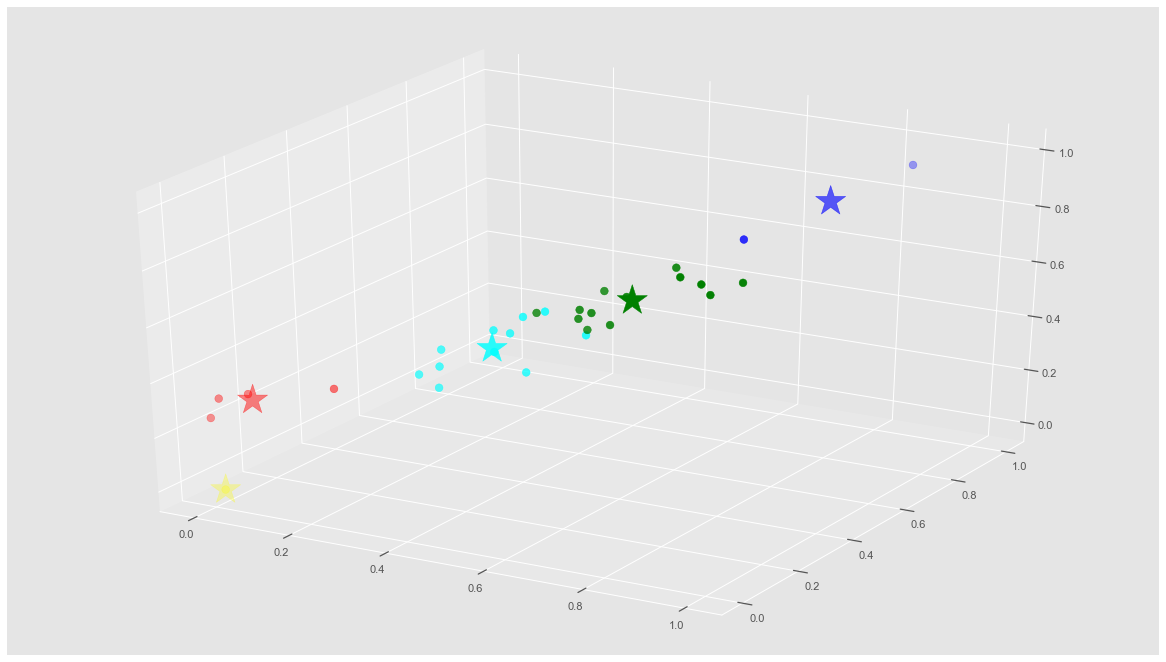

In [86]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 1], X[:, 0], X[:, 4], c=asignar,s=60)
ax.scatter(C[:, 1], C[:, 0], C[:, 4], marker='*', c=colores, s=1000)

In [87]:
#ClusterProgramas

#Modificar
dfProgramas = dfModelo0.groupby("estu_prgm_academico").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean, 'APROBACIÓN': np.mean, 'REPITENCIA': np.mean, 'mod_lectura_critica_punt': np.mean,'inst_nombre_institucion': pd.Series.nunique})
dfProgramas=dfProgramas.dropna()
df=dfProgramas

min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.

X = np.array(df_escalado)
#X = np.array(dfDpto1[["Estudiantes","mod_razona_cuantitat_punt","mod_lectura_critica_punt", 'APROBACIÓN', 'estu_prgm_academico']])
y = np.array(df.index)

nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score

#Modificar
kmeans = KMeans(n_clusters=8).fit(df_escalado)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_escalado)

#Modificar
df_escalado = df_escalado.rename(columns = {0: 'Estudiantes', 1: 'Razona', 2: 'Aprobacion', 3: 'Repitencia', 4: 'Lectura', 5: 'Instituciones'})
dfProgramas['ClusterProgramasEscalado'] = labels+1
dfProgramas.head()


,Estudiantes,mod_razona_cuantitat_punt,APROBACIÓN,REPITENCIA,mod_lectura_critica_punt,inst_nombre_institucion,ClusterProgramasEscalado
estu_prgm_academico,,,,,,,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,231,139.207792,88.382100,3.192500,143.467532,1,5
ACTIVIDAD FISICA Y DEPORTE,133,136.909774,88.382100,3.192500,138.315789,1,5
ACUICULTURA,109,139.449541,93.504848,3.411801,127.082569,1,1
ADMINISTRACION,161,144.409938,90.256503,2.372194,142.031056,3,7
ADMINISTRACION FINANCIERA,176,140.465909,89.118683,1.197736,137.232955,2,3


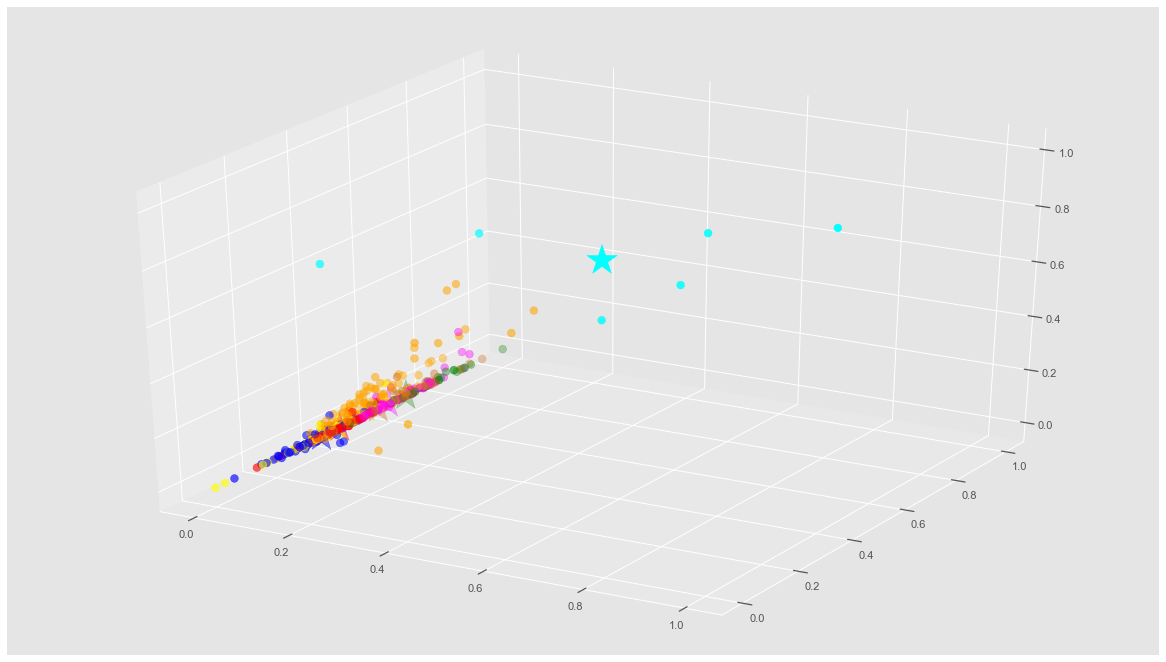

In [88]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow'
         , 'chocolate', 'orange', 'magenta'
        ]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],X[:, 5], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1],C[:, 5], marker='*', c=colores, s=1000)

In [89]:
#ClusterInstituciones

#Modificar
dfInstituciones = dfModelo0.groupby("inst_nombre_institucion").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean, 'APROBACIÓN': np.mean, 'REPITENCIA': np.mean, 'mod_lectura_critica_punt': np.mean,'estu_prgm_academico': pd.Series.nunique})
dfInstituciones=dfInstituciones.dropna()
df=dfInstituciones



min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.

X = np.array(df_escalado)
#X = np.array(dfDpto1[["Estudiantes","mod_razona_cuantitat_punt","mod_lectura_critica_punt", 'APROBACIÓN', 'estu_prgm_academico']])
y = np.array(df.index)


nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score

#Modificar
kmeans = KMeans(n_clusters=15).fit(df_escalado)


centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_escalado)

#Modificar
df_escalado = df_escalado.rename(columns = {0: 'Estudiantes', 1: 'Razona', 2: 'Aprobacion', 3: 'Repitencia', 4: 'Lectura', 5: 'Programas'})
dfInstituciones['ClusterInstitucionEscalado'] = labels+1
dfInstituciones.head()


,Estudiantes,mod_razona_cuantitat_punt,APROBACIÓN,REPITENCIA,mod_lectura_critica_punt,estu_prgm_academico,ClusterInstitucionEscalado
inst_nombre_institucion,,,,,,,
COL NORMAL SUPERIOR MANUEL CAÑIZALEZQUIBDO,22,118.181818,88.456900,1.076000,117.363636,1,11
COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACIONCESABOGOTA D.C.,882,183.938776,97.119046,2.568711,177.571429,1,13
COLEGIO MAYOR DE ANTIOQUIAMEDELLIN,1841,152.559479,88.396109,3.191840,153.765345,7,1
COLEGIO MAYOR DE BOLIVARCARTAGENA,268,124.317164,90.466300,3.591700,131.119403,3,6
COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIOBOGOTA D.C.,6360,167.548428,97.160851,2.574115,178.281132,22,13


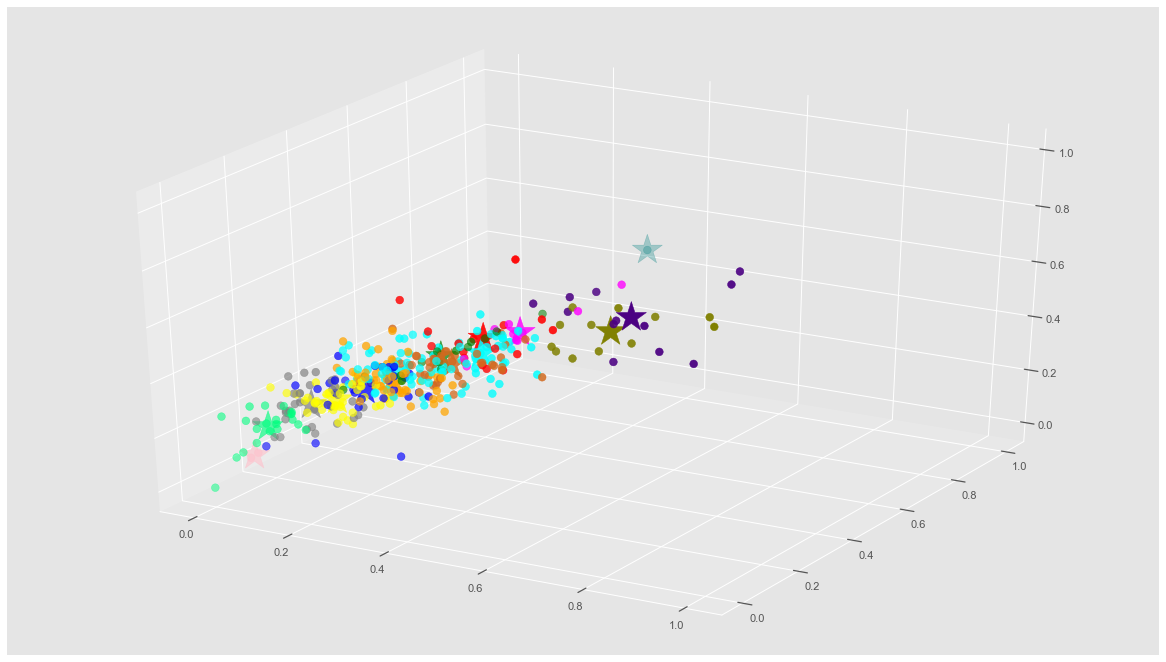

In [90]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow'
         , 'gray'
         , 'chocolate', 'orange', 'magenta', 'olive'
         , 'springgreen', 'aqua', 'indigo', 'pink'
         , 'teal'
        ]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 1], X[:, 0], X[:, 4], c=asignar,s=60)
ax.scatter(C[:, 1], C[:, 0], C[:, 4], marker='*', c=colores, s=1000)

In [91]:
dfInstituciones['ClusterInstitucionEscalado'] = dfInstituciones['ClusterInstitucionEscalado'].apply(str)
dfDpto['ClusterDepartamentoEscalado'] = dfDpto['ClusterDepartamentoEscalado'].apply(str)
dfProgramas['ClusterProgramasEscalado'] = dfProgramas['ClusterProgramasEscalado'].apply(str)
dfInstituciones['Institucion'] = dfInstituciones.index
dfDpto['DepartamentoClus'] = dfDpto.index
dfProgramas['Programas'] = dfProgramas.index

In [92]:
dfInstituciones1 = dfInstituciones.groupby("ClusterInstitucionEscalado").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean,  'mod_lectura_critica_punt': np.mean})
dfDpto1 = dfDpto.groupby("ClusterDepartamentoEscalado").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean,  'mod_lectura_critica_punt': np.mean})
dfProgramas1 = dfProgramas.groupby("ClusterProgramasEscalado").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean,  'mod_lectura_critica_punt': np.mean})


In [93]:
dfInstituciones1.sort_values( ['mod_razona_cuantitat_punt'],ascending=False)

,Estudiantes,mod_razona_cuantitat_punt,mod_lectura_critica_punt
ClusterInstitucionEscalado,,,
13,72023,178.199031,174.850211
10,48741,176.082249,170.356029
9,109177,155.672949,157.649769
1,40498,155.616056,161.998659
4,143003,154.307506,154.802909
7,154266,149.053643,148.805319
8,64120,140.423438,141.604565
12,69296,140.343346,144.501186
2,202656,138.975819,139.781098


In [94]:
dfDpto1.sort_values( ['mod_razona_cuantitat_punt'],ascending=False)

,Estudiantes,mod_razona_cuantitat_punt,mod_lectura_critica_punt
ClusterDepartamentoEscalado,,,
3,548787,151.234899,152.985952
2,384291,148.824217,149.109194
4,97718,138.809422,138.586447
1,14447,118.966403,122.518340
5,18,116.388889,105.222222


In [95]:
dfProgramas1.sort_values( ['mod_razona_cuantitat_punt'],ascending=False)

,Estudiantes,mod_razona_cuantitat_punt,mod_lectura_critica_punt
ClusterProgramasEscalado,,,
2,9658,170.469508,175.838582
8,44300,162.189631,170.554096
6,23843,157.884597,164.616509
7,425367,147.608350,150.836498
4,426814,145.658793,145.478804
1,35433,140.712818,144.146326
5,31929,139.872780,146.219382
3,47909,132.600192,135.138954


In [96]:

dfInstituciones.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\Data\dfInstituciones.csv', header=True)

In [97]:

dfDpto.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\Data\dfDpto.csv', header=True)

In [98]:
dfProgramas.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\Data\dfProgramas.csv', header=True)

In [99]:
dfDpto['mod_razona_cuantitat_puntDpto']=dfDpto['mod_razona_cuantitat_punt']
dfDpto['mod_razona_cuantitat_puntPrograma']=dfProgramas['mod_razona_cuantitat_punt']
dfDpto['mod_razona_cuantitat_puntInstituciones']=dfInstituciones['mod_razona_cuantitat_punt']



## Base 4 años

In [100]:
dfClus1 = pd.merge(dfModelo0,
              dfProgramas[['ClusterProgramasEscalado', 'Programas']],
              left_on='estu_prgm_academico', right_on='Programas'
              , how='left')
dfClus1.shape

(1045290, 146)

In [101]:
dfClust2 = pd.merge(dfClus1,
              dfInstituciones[['ClusterInstitucionEscalado', 'Institucion']],
              left_on='inst_nombre_institucion', right_on='Institucion'
              , how='left')
dfClust2.shape

(1045290, 148)

In [102]:
dfDpto.columns

Index(['Estudiantes', 'mod_razona_cuantitat_punt', 'APROBACIÓN', 'REPITENCIA',
       'mod_lectura_critica_punt', 'estu_prgm_academico',
       'estu_mcpio_reside_x', 'inst_nombre_institucion',
       'ClusterDepartamentoEscalado', 'DepartamentoClus',
       'mod_razona_cuantitat_puntDpto', 'mod_razona_cuantitat_puntPrograma',
       'mod_razona_cuantitat_puntInstituciones'],
      dtype='object')

In [103]:
dfModelo = pd.merge(dfClust2,
              dfDpto[['mod_razona_cuantitat_puntDpto', 'ClusterDepartamentoEscalado', 'DepartamentoClus']],
              left_on='estu_depto_reside_x', right_on='DepartamentoClus'
              , how='left')
dfModelo.shape

(1045290, 151)

In [104]:
dfModelo= dfModelo.drop(columns =[
                          'Institucion',
                        'Programas',
                        'CODIGO_DEPARTAMENTO', 'APROBACIÓN', 'REPITENCIA',
                        'Departamento_y', 'Departamento_x', 'CodDpto', 'Dpto', 'Educacionpadre', 'Educacionmadre', 'estu_horassemanatrabaja_y',
                        'estu_cod_reside_mcpio_x',
                        'estu_cole_termino',
                        'estu_snies_prgmacademico',
                        'inst_cod_institucion',
                        'estu_cod_cole_mcpio_termino',
                        'estu_coddane_cole_termino',
                        'estu_cod_reside_depto_x',
                        #'mod_comuni_escrita_desem',
                        'mod_comuni_escrita_pnal',
                        #'mod_comuni_escrita_punt',
                        'estu_cod_reside_mcpio_y',
                        'fami_numlibros',
                        'punt_lectura_critica',
                        'decil_lectura_critica',
                        'decil_matematicas',
                        'punt_c_naturales',
                        'decil_c_naturales',
                        'punt_sociales_ciudadanas',
                        'decil_sociales_ciudadanas',
                        'punt_razona_cuantitativo',
                        'decil_razona_cuantitativo',
                        'punt_comp_ciudadana',
                        'decil_comp_ciudadana',
                        'decil_ingles',
                        'punt_global_y',
                        'cole_codigo_icfes',
                        'cole_cod_dane_establecimiento',
                        'cole_cod_dane_sede',
                        'cole_cod_mcpio_ubicacion',
                        'cole_cod_depto_ubicacion',
                        'estu_cod_reside_depto_y',
                        'Educacionpadres',
                        'estu_coddane_cole_termino1', 'DepartamentoClus'

                        ])

In [105]:
dfModelo['estu_metodo_prgm'] = dfModelo['estu_metodo_prgm'].str.replace('DISTANCIA VITUAL', 'DISTANCIA') 
dfModelo['estu_metodo_prgm'] = dfModelo['estu_metodo_prgm'].str.replace('DISTANCIA VIRTUAL', 'DISTANCIA') 

dfModelo['cole_genero'] = dfModelo['cole_genero'].str.replace('FEMENINO', 'F') 
dfModelo['cole_genero'] = dfModelo['cole_genero'].str.replace('MASCULINO', 'M') 

dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Cuatro', '3 a 4') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Una', '1 a 2') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Dos', '1 a 2') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Tres', '3 a 4') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Cinco', '5 a 6') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Seis', '5 a 6') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Siete', '7 a 8') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Ocho', '7 a 8') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Nueve', '9 o mas') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Diez', '9 o mas') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Once', '9 o mas') 
dfModelo['fami_personashogar'] = dfModelo['fami_personashogar'].str.replace('Doce o mas', '9 o mas') 


dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Entre 1 millon y menos de 2.5 millones', '2 0.5M-4M')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Entre 2.5 millones y menos de 4 millones', '2 0.5M-4M')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Menos de 500 mil', '1 Menos de 500 mil')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Entre 500 mil y menos de 1 millon', '2 0.5M-4M')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Entre 4 millones y menos de 5.5 millones', '3 4M-7M')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Mas de 7 millones', '4 7+')
dfModelo['estu_valormatriculauniversidad'] = dfModelo['estu_valormatriculauniversidad'].str.replace('Entre 5.5 millones y menos de 7 millones', '3 4M-7M')


dfModelo['cole_bilingue'] = dfModelo['cole_bilingue'].str.replace('0.0', 'N')
dfModelo['cole_bilingue'] = dfModelo['cole_bilingue'].str.replace('1.0', 'S')
dfModelo['cole_bilingue'] = dfModelo['cole_bilingue'].str.replace('1', 'S')
dfModelo['cole_bilingue'] = dfModelo['cole_bilingue'].str.replace('0', 'N')




In [106]:
dfModelo=dfModelo.rename(columns={
                                    'estu_comocapacitoexamensb11' : 'Saber11Preparation', 
                                    'estu_genero' : 'Gender', 
                                    'estu_horassemanatrabaja_x' : 'HrsWorking', 
                                    'estu_metodo_prgm' : 'TypeProgram', 
                                    'estu_nucleo_pregrado' : 'RootProgram', 
                                    'estu_pagomatriculabeca' : 'PaydScholarship', 
                                    'estu_pagomatriculacredito' : 'PaydCredit', 
                                    'estu_pagomatriculapadres' : 'PaydParents', 
                                    'estu_pagomatriculapropio' : 'PaydYourself', 
                                    'fami_educacionmadre_x' : 'MotherEducation', 
                                    'fami_educacionpadre_x' : 'FatherEducation', 
                                    'fami_estratovivienda_x' : 'SocialStrata', 
                                    'fami_tieneautomovil' : 'HaveVehicle', 
                                    'fami_tienecomputador' : 'HaveComputer', 
                                    'fami_tienehornomicroogas' : 'HaveOvenGas', 
                                    'fami_tieneinternet' : 'HaveInternet', 
                                    'fami_tienelavadora' : 'HaveWasherMachine', 
                                    'fami_tienemotocicleta' : 'HaveMoto', 
                                    'inst_caracter_academico' : 'UniversityAcademicLevel', 
                                    'estu_areareside_x' : 'ZoneLive', 
                                    'fami_cuantoscompartebaño' : 'ShareBathroom', 
                                    'fami_trabajolabormadre' : 'MotherJob', 
                                    'fami_trabajolaborpadre' : 'FatherJob', 
                                    'gruporeferencia' : 'UniversityGroup', 
                                    'estu_depto_presentacion_x' : 'StateExam', 
                                    'estu_depto_reside_x' : 'StateLive', 
                                    'estu_fechanacimiento' : 'BirthDate', 
                                    'estu_inst_departamento' : 'StateUniversity', 
                                    'estu_inst_municipio' : 'CityUniversity', 
                                    'estu_mcpio_reside_x' : 'CityLive', 
                                    'estu_prgm_academico' : 'Program', 
                                    'estu_prgm_departamento' : 'StateProgram', 
                                    'estu_valormatriculauniversidad' : 'CostUniversiteSemester', 
                                    'inst_nombre_institucion' : 'UniversityName', 
                                    'inst_origen' : 'UniversityOrigin', 
                                    'estu_pais_reside_x' : 'CountryLive', 
                                    'mod_competen_ciudada_desem' : 'CompetenceCitizen4Levels', 
                                    'mod_competen_ciudada_pnal' : 'CompetenceCitizenNational', 
                                    'mod_competen_ciudada_punt' : 'CompetenceCitizenScore', 
                                    'mod_ingles_desem' : 'CompetenceEnglish4Levels', 
                                    'mod_ingles_pnal' : 'CompetenceEnglishNational', 
                                    'mod_ingles_punt' : 'CompetenceEnglishScore', 
                                    'mod_lectura_critica_desem' : 'CompetenceReading4Levels', 
                                    'mod_lectura_critica_pnal' : 'CompetenceReadingNational', 
                                    'mod_lectura_critica_punt' : 'CompetenceReadingScore', 
                                    'mod_razona_cuantitat_desem' : 'CompetenceQuantitativeReasoning4Levels', 
                                    'mod_razona_cuantitat_punt' : 'CompetenceQuantitativeReasoningScore', 
                                    'mod_razona_cuantitativo_pnal' : 'CompetenceQuantitativeReasoningNational', 
                                    'mod_comuni_escrita_desem': 'CompetenceComunication4Levels', 
                                    'mod_comuni_escrita_punt': 'CompetenceComunicationScore', 
                                    'percentil_global' : 'GlobalScorePercentile', 
                                    'punt_global_x' : 'GlobalScore', 
                                    'estu_consecutivo' : 'KeyStudentID', 
                                    'estu_consecutivo_11' : 'KeyStudentIDS11', 
                                    'estu_consecutivo_PRO' : 'KeyStudentIDPRO', 
                                    'KeySaber11_x' : 'KeyS11', 
                                    'KeySaberPRO' : 'KeySPro', 
                                    'periodo_x' : 'PeriodSPro', 
                                    'estu_pais_reside_y' : 'CountryHighSchool', 
                                    'estu_depto_reside_y' : 'StateLiveHighSchool', 
                                    'estu_mcpio_reside_y' : 'CityLiveHighSchool', 
                                    'estu_areareside_y' : 'ZoneLiveHighSchool', 
                                    'fami_educacionpadre_y' : 'FatherEducationHighSchool', 
                                    'fami_educacionmadre_y' : 'MotherEducationHighSchool', 
                                    'fami_personashogar' : 'HomeNumberPeople', 
                                    'fami_cuartoshogar' : 'HomeNumberRooms', 
                                    'estu_depto_presentacion_y' : 'StateExamHighSchool', 
                                    'punt_matematicas' : 'ScoreMathHighSchool', 
                                    'punt_ingles' : 'ScoreEnglishHighSchool', 
                                    'desemp_ingles' : 'ScoreEnglishHighSchoolLevels', 
                                    'estu_puesto' : 'PositionScoreHighSchool', 
                                    'cole_nombre_establecimiento' : 'HighSchool', 
                                    'cole_genero' : 'GenderHighSchool', 
                                    'cole_naturaleza' : 'HighSchoolType', 
                                    'cole_calendario' : 'HighSchoolCalendar', 
                                    'cole_bilingue' : 'HighSchoolBilingual', 
                                    'cole_caracter' : 'HighSchoolTypeAcademic', 
                                    'cole_nombre_sede' : 'HighSchoolNameBranch', 
                                    'cole_sede_principal' : 'HighSchoolNamePrincipal', 
                                    'cole_area_ubicacion' : 'HighSchoolZone', 
                                    'cole_jornada' : 'HighSchoolSchedule', 
                                    'cole_mcpio_ubicacion' : 'CityHighSchool', 
                                    'cole_depto_ubicacion' : 'StateHighSchool', 
                                    'fami_estratovivienda_y' : 'SocialStrataHighSchool', 
                                    'periodo_y' : 'PeriodS11', 
                                    'KeySaber11_y' : 'KeyS11_', 
                                    'YearPro' : 'YearExam', 
                                    'YearS11' : 'YearS11', 
                                    'TimeProS11' : 'TimeExamvsS11', 
                                    'EstuTrabaja' : 'StudentWorks', 
                                    'ResideProgIgual' : 'StateLiveProgramSame', 
                                    'ResidePresentaIgual' : 'StateLiveExamSame', 
                                    'ResideColegioMunIgual' : 'StateLiveHighSchoolSame', 
                                    'Estudiantes' : 'Students', 
                                    'Estrato' : 'SocialStrataNumber', 
                                    'fami_cuantoscompartebaño2' : 'HomeNumberBath', 
                                    'Edad' : 'Age', 
                                    'Lat_Reside' : 'LatLive', 
                                    'Lon_Reside' : 'LonLive', 
                                    'REGION' : 'RegionState', 
                                    'Lat_Prog' : 'LatProgram', 
                                    'Lon_Prog' : 'LonProgram', 
                                    'distanciaResideProg' : 'DistanceStateLiveProgram', 
                                    'ClusterProgramasEscalado' : 'ClusterProgram', 
                                    'ClusterInstitucionEscalado' : 'ClusterUniversity', 
                                    'mod_razona_cuantitat_puntDpto' : 'StateScore', 
                                    'ClusterDepartamentoEscalado' : 'ClusterState' 

                                 })

In [107]:
dfModelo['ClusterUniversity'] = dfModelo['ClusterUniversity'].astype('str')
dfModelo['StudentWorks'] = dfModelo['StudentWorks'].astype('str')
dfModelo['StateLiveProgramSame'] = dfModelo['StateLiveProgramSame'].astype('str')

dfModelo['StateLiveExamSame'] = dfModelo['StateLiveExamSame'].astype('str')
dfModelo['StateLiveHighSchoolSame'] = dfModelo['StateLiveHighSchoolSame'].astype('str')
dfModelo['ClusterProgram'] = dfModelo['ClusterProgram'].astype('str')
dfModelo['ClusterState'] = dfModelo['ClusterState'].astype('str')
dfModelo['CompetenceCitizen4Levels'] = dfModelo['CompetenceCitizen4Levels'].astype('str')
dfModelo['CompetenceReading4Levels'] = dfModelo['CompetenceReading4Levels'].astype('str')
dfModelo['CompetenceQuantitativeReasoning4Levels'] = dfModelo['CompetenceQuantitativeReasoning4Levels'].astype('str')

In [108]:
dfModelo.head()

,Saber11Preparation,Gender,HrsWorking,TypeProgram,RootProgram,PaydScholarship,PaydCredit,PaydParents,PaydYourself,MotherEducation,...,LatLive,LonLive,RegionState,LatProgram,LonProgram,DistanceStateLiveProgram,ClusterProgram,ClusterUniversity,StateScore,ClusterState
0,Repaso por cuenta propia,F,Mas de 30 horas,DISTANCIA,ADMINISTRACION,No,No,No,Si,2Bachiller,...,5.0,-74.166667,Región Centro Oriente,4.6,-74.083333,45.426333,7,15,154.751503,2
1,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,CIENCIAS SOCIALES,No,No,Si,No,2Bachiller,...,4.6,-74.083333,Región Centro Oriente,4.6,-74.083333,0.000000,4,12,150.497311,3
2,Repaso por cuenta propia,F,0,PRESENCIAL,CIENCIAS DE LA SALUD,No,No,Si,No,2Bachiller,...,8.0,-73.000000,Región Centro Oriente,8.0,-73.000000,0.000000,7,7,145.070582,2
3,No realizo ninguna prueba de preparacion,M,0,PRESENCIAL,INGENIERIA,Si,No,No,No,4Profesional,...,4.6,-74.083333,Región Centro Oriente,4.6,-74.083333,0.000000,8,13,150.497311,3
4,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,No,Si,4Profesional,...,9.0,-74.333333,Región Caribe,9.0,-74.333333,0.000000,7,12,141.103866,2


In [109]:
for col in dfModelo.columns:
    pct_missing = np.mean(dfModelo[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Saber11Preparation - 1.0%
Gender - 0.0%
HrsWorking - 3.0%
TypeProgram - 0.0%
RootProgram - 0.0%
PaydScholarship - 1.0%
PaydCredit - 1.0%
PaydParents - 1.0%
PaydYourself - 1.0%
MotherEducation - 3.0%
FatherEducation - 3.0%
SocialStrata - 3.0%
HaveVehicle - 3.0%
HaveComputer - 3.0%
HaveOvenGas - 4.0%
HaveInternet - 3.0%
HaveWasherMachine - 3.0%
HaveMoto - 5.0%
UniversityAcademicLevel - 0.0%
ZoneLive - 26.0%
ShareBathroom - 53.0%
MotherJob - 53.0%
FatherJob - 53.0%
UniversityGroup - 0.0%
StateExam - 0.0%
StateLive - 0.0%
BirthDate - 0.0%
StateUniversity - 0.0%
CityUniversity - 0.0%
CityLive - 0.0%
Program - 0.0%
StateProgram - 0.0%
CostUniversiteSemester - 1.0%
UniversityName - 0.0%
UniversityOrigin - 0.0%
CountryLive - 25.0%
CompetenceCitizen4Levels - 0.0%
CompetenceCitizenNational - 0.0%
CompetenceCitizenScore - 0.0%
CompetenceComunication4Levels - 76.0%
CompetenceComunicationScore - 2.0%
CompetenceEnglish4Levels - 0.0%
CompetenceEnglishNational - 0.0%
CompetenceEnglishScore - 0.0%
Comp

In [110]:
for i in dfModelo.columns:
    print(i, dfModelo[i].dtypes, dfModelo[i].value_counts().count())
    

Saber11Preparation object 3
Gender object 2
HrsWorking object 5
TypeProgram object 3
RootProgram object 12
PaydScholarship object 2
PaydCredit object 2
PaydParents object 2
PaydYourself object 2
MotherEducation object 6
FatherEducation object 8
SocialStrata object 8
HaveVehicle object 2
HaveComputer object 2
HaveOvenGas object 2
HaveInternet object 2
HaveWasherMachine object 2
HaveMoto object 2
UniversityAcademicLevel object 5
ZoneLive object 2
ShareBathroom object 8
MotherJob object 13
FatherJob object 13
UniversityGroup object 22
StateExam object 75
StateLive object 34
BirthDate object 35782
StateUniversity object 30
CityUniversity object 139
CityLive object 1088
Program object 743
StateProgram object 31
CostUniversiteSemester object 5
UniversityName object 383
UniversityOrigin object 6
CountryLive object 90
CompetenceCitizen4Levels object 5
CompetenceCitizenNational float64 100
CompetenceCitizenScore float64 184
CompetenceComunication4Levels object 8
CompetenceComunicationScore floa

## Indicadores hasta el 2018

In [111]:
dfModeloupto2018=dfModelo[(dfModelo.YearExam <= 2018)].copy()
dfModeloupto2018.shape

(773657, 107)

In [112]:
dfKPIsState = dfModeloupto2018.groupby("StateProgram").agg({'CompetenceCitizenScore': np.mean, 'CompetenceEnglishScore': np.mean, 'CompetenceReadingScore': np.mean, 'CompetenceQuantitativeReasoningScore': np.mean, 'CompetenceComunicationScore': np.mean})
dfKPIsState=dfKPIsState.dropna()

dfKPIsState=dfKPIsState.rename(columns={
                                    'CompetenceCitizenScore' : 'CitizenScore3yearsState', 
                                    'CompetenceEnglishScore' : 'EnglishScore3yearsState', 
                                    'CompetenceReadingScore' : 'ReadingScore3yearsState', 
                                    'CompetenceQuantitativeReasoningScore' : 'QuantitativeReasoningScore3yearsState',
                                    'CompetenceComunicationScore' : 'ComunicationScore3yearsState'
    

                                 })


In [113]:
dfKPIsProgram = dfModeloupto2018.groupby("Program").agg({'CompetenceCitizenScore': np.mean, 'CompetenceEnglishScore': np.mean, 'CompetenceReadingScore': np.mean, 'CompetenceQuantitativeReasoningScore': np.mean, 'CompetenceComunicationScore': np.mean})
dfKPIsProgram=dfKPIsProgram.dropna()

dfKPIsProgram=dfKPIsProgram.rename(columns={
                                    'CompetenceCitizenScore' : 'CitizenScore3yearsProgram', 
                                    'CompetenceEnglishScore' : 'EnglishScore3yearsProgram', 
                                    'CompetenceReadingScore' : 'ReadingScore3yearsProgram', 
                                    'CompetenceQuantitativeReasoningScore' : 'QuantitativeReasoningScore3yearsProgram',
                                    'CompetenceComunicationScore' : 'ComunicationScore3yearsProgram'

                                 })

In [114]:
dfKPIsUniversity = dfModeloupto2018.groupby("UniversityName").agg({'CompetenceCitizenScore': np.mean, 'CompetenceEnglishScore': np.mean, 'CompetenceReadingScore': np.mean, 'CompetenceQuantitativeReasoningScore': np.mean, 'CompetenceComunicationScore': np.mean})
dfKPIsUniversity=dfKPIsUniversity.dropna()

dfKPIsUniversity=dfKPIsUniversity.rename(columns={
                                    'CompetenceCitizenScore' : 'CitizenScore3yearsUniversity', 
                                    'CompetenceEnglishScore' : 'EnglishScore3yearsUniversity', 
                                    'CompetenceReadingScore' : 'ReadingScore3yearsUniversity', 
                                    'CompetenceQuantitativeReasoningScore' : 'QuantitativeReasoningScore3yearsUniversity',
                                    'CompetenceComunicationScore' : 'ComunicationScore3yearsUniversity'

                                 })

In [115]:
dfKPIsState.sort_values( ['ComunicationScore3yearsState'],ascending=False)

,CitizenScore3yearsState,EnglishScore3yearsState,ReadingScore3yearsState,QuantitativeReasoningScore3yearsState,ComunicationScore3yearsState
StateProgram,,,,,
CUNDINAMARCA,149.700992,159.263915,154.375953,154.971523,154.795389
CALDAS,150.459667,152.943427,155.552417,154.354834,153.053489
ANTIOQUIA,148.943988,154.713612,155.229801,152.728671,152.176737
CAUCA,141.311173,141.244191,147.485513,146.197217,152.011263
BOGOTA,147.230332,153.545630,151.828865,151.401041,151.741411
BOYACA,148.786922,147.776726,152.919958,155.990170,151.675196
NARIÑO,140.673322,141.392334,147.149603,146.862858,151.430166
SANTANDER,146.992719,153.909232,153.632687,156.747025,151.264559
RISARALDA,145.598773,153.123252,150.027844,149.583465,151.187189


In [116]:
dfKPIsProgram.sort_values( ['QuantitativeReasoningScore3yearsProgram'],ascending=False).head(15)

,CitizenScore3yearsProgram,EnglishScore3yearsProgram,ReadingScore3yearsProgram,QuantitativeReasoningScore3yearsProgram,ComunicationScore3yearsProgram
Program,,,,,
INGENIERIA MATEMATICA,185.437500,203.406250,190.718750,210.187500,156.000000
MATEMATICAS APLICADAS,163.583333,182.666667,184.833333,205.083333,169.000000
INGENIERIA DE CONTROL,168.728261,186.391304,183.130435,198.902174,155.306818
ASTRONOMIA,173.882353,196.941176,190.058824,197.000000,154.882353
INGENIERIA BIOLOGICA,174.301136,184.863636,185.534091,195.812500,166.815029
GEOCIENCIAS,176.141892,206.635135,188.966216,195.472973,178.815068
INGENIERIA EN NANOTECNOLOGIA,156.529412,186.411765,180.411765,194.705882,163.000000
FISICA,162.053763,185.440860,177.946237,194.081413,159.189573
INGENIERIA DE SISTEMAS E INFORMATICA,173.218905,190.427861,180.388060,193.447761,155.208122


In [117]:
dfKPIsUniversity.sort_values( ['ComunicationScore3yearsUniversity'],ascending=False).head(15)

,CitizenScore3yearsUniversity,EnglishScore3yearsUniversity,ReadingScore3yearsUniversity,QuantitativeReasoningScore3yearsUniversity,ComunicationScore3yearsUniversity
UniversityName,,,,,
ESCUELA NORMAL SUPERIOR MARIA AUXILIADORASOACHA,155.428571,169.285714,154.428571,144.142857,184.142857
UNIVERSIDAD DE LOS ANDESBOGOTA D.C.,179.986104,210.435826,188.051920,190.685321,179.261383
UNIVERSIDAD DE ANTIOQUIASANTAFE DE ANTIOQUIA,176.000000,189.000000,195.000000,163.000000,179.000000
FUNDACION UNIVERSITARIA SEMINARIO BIBLICO DE COLOMBIA FUSBCMEDELLIN,154.795455,166.159091,172.000000,148.250000,177.045455
NORMAL SUPERIOR MARIA AUXILIADORACUCUTA,164.352941,142.058824,161.352941,141.529412,175.764706
COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIOBOGOTA D.C.,174.683580,197.011989,178.975808,169.070221,172.855739
UNIVERSIDAD DE LA SABANACHIA,167.328544,196.472701,173.522989,167.642960,171.835437
UNIVERSIDAD ICESICALI,172.191871,191.488636,179.836101,178.482080,171.801061
COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACIONCESABOGOTA D.C.,173.946508,210.676077,177.879643,184.364042,171.670866


## Base para el modelo

In [118]:
dfModelo2019a=dfModelo[(dfModelo.PeriodS11 >= 0)].copy()
dfModelo2019b=dfModelo2019a[(dfModelo2019a.YearExam == 2019)].copy()
dfModelo2019b.shape

(148011, 107)

In [119]:
dfModelo2019c = pd.merge(dfModelo2019b,
              dfKPIsState,
              left_on='StateProgram', right_on='StateProgram'
              , how='left')
dfModelo2019c.shape

(148011, 112)

In [120]:
dfModelo2019d = pd.merge(dfModelo2019c,
              dfKPIsProgram,
              left_on='Program', right_on='Program'
              , how='left')
dfModelo2019d.shape

(148011, 117)

In [121]:
dfModelo2019 = pd.merge(dfModelo2019d,
              dfKPIsUniversity,
              left_on='UniversityName', right_on='UniversityName'
              , how='left')
dfModelo2019.shape

(148011, 122)

In [122]:
dfModelo2019.head()

,Saber11Preparation,Gender,HrsWorking,TypeProgram,RootProgram,PaydScholarship,PaydCredit,PaydParents,PaydYourself,MotherEducation,...,CitizenScore3yearsProgram,EnglishScore3yearsProgram,ReadingScore3yearsProgram,QuantitativeReasoningScore3yearsProgram,ComunicationScore3yearsProgram,CitizenScore3yearsUniversity,EnglishScore3yearsUniversity,ReadingScore3yearsUniversity,QuantitativeReasoningScore3yearsUniversity,ComunicationScore3yearsUniversity
0,Tomo un curso de preparacion,F,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,Si,Si,Si,1NoBachiller,...,138.998629,144.131501,142.857461,145.24369,147.136137,135.72335,137.431472,138.26269,143.161168,142.095052
1,No realizo ninguna prueba de preparacion,F,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,Si,Si,1NoBachiller,...,138.998629,144.131501,142.857461,145.24369,147.136137,135.72335,137.431472,138.26269,143.161168,142.095052
2,Tomo un curso de preparacion,F,Entre 11 y 20 horas,PRESENCIAL,ADMINISTRACION,No,No,Si,No,4Profesional,...,138.998629,144.131501,142.857461,145.24369,147.136137,135.72335,137.431472,138.26269,143.161168,142.095052
3,No realizo ninguna prueba de preparacion,F,0,PRESENCIAL,ADMINISTRACION,No,No,Si,No,2Bachiller,...,138.998629,144.131501,142.857461,145.24369,147.136137,135.72335,137.431472,138.26269,143.161168,142.095052
4,Repaso por cuenta propia,F,Mas de 30 horas,PRESENCIAL,ADMINISTRACION,No,No,No,Si,1NoBachiller,...,138.998629,144.131501,142.857461,145.24369,147.136137,135.72335,137.431472,138.26269,143.161168,142.095052


In [128]:
dfModelo2019['CompetenceComunicationScore'].head()

0    145.0
1    107.0
2    107.0
3    137.0
4    173.0
Name: CompetenceComunicationScore, dtype: float64

In [131]:
dfModelo2019['CompetenceComunicationScore'] =dfModelo2019['CompetenceComunicationScore'].replace(0, np.nan)
dfModelo2019['CompetenceReadingScore'] =dfModelo2019['CompetenceReadingScore'].replace(0, np.nan)
dfModelo2019['CompetenceEnglishScore'] =dfModelo2019['CompetenceEnglishScore'].replace(0, np.nan)
dfModelo2019['CompetenceQuantitativeReasoningScore'] =dfModelo2019['CompetenceQuantitativeReasoningScore'].replace(0, np.nan)
dfModelo2019['CompetenceCitizenScore'] =dfModelo2019['CompetenceCitizenScore'].replace(0, np.nan)
dfModelo2019['GlobalScore'] =dfModelo2019['GlobalScore'].replace(0, np.nan)

dfModelo2019['CompetenceComunicationScore'].head()

0    145.0
1    107.0
2    107.0
3    137.0
4    173.0
Name: CompetenceComunicationScore, dtype: float64

In [132]:
for col in dfModelo2019.columns:
    pct_missing = np.mean(dfModelo2019[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Saber11Preparation - 1.0%
Gender - 0.0%
HrsWorking - 5.0%
TypeProgram - 0.0%
RootProgram - 0.0%
PaydScholarship - 2.0%
PaydCredit - 2.0%
PaydParents - 2.0%
PaydYourself - 2.0%
MotherEducation - 4.0%
FatherEducation - 4.0%
SocialStrata - 6.0%
HaveVehicle - 5.0%
HaveComputer - 5.0%
HaveOvenGas - 5.0%
HaveInternet - 4.0%
HaveWasherMachine - 5.0%
HaveMoto - 5.0%
UniversityAcademicLevel - 0.0%
ZoneLive - 1.0%
ShareBathroom - 5.0%
MotherJob - 5.0%
FatherJob - 5.0%
UniversityGroup - 0.0%
StateExam - 0.0%
StateLive - 1.0%
BirthDate - 0.0%
StateUniversity - 0.0%
CityUniversity - 0.0%
CityLive - 1.0%
Program - 0.0%
StateProgram - 0.0%
CostUniversiteSemester - 2.0%
UniversityName - 0.0%
UniversityOrigin - 0.0%
CountryLive - 0.0%
CompetenceCitizen4Levels - 0.0%
CompetenceCitizenNational - 0.0%
CompetenceCitizenScore - 0.0%
CompetenceComunication4Levels - 100.0%
CompetenceComunicationScore - 3.0%
CompetenceEnglish4Levels - 0.0%
CompetenceEnglishNational - 0.0%
CompetenceEnglishScore - 0.0%
Competen

In [133]:
dfModelo2019.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\data\dfModelo2019.csv', header=True)


In [134]:
dfModelo.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\data\dfModelo.csv', header=True)
